# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for this demonstration
- Load the data
- Ensure that qualitative predictor variables are of the *category* data type
- Conduct basic EDA on the dataset

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import the min-max scaled from 'sklearn'
from sklearn.preprocessing import MinMaxScaler

# Import the ridge and LASSO regression models from 'sklearn'
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Data source
# link = 'https://archive.ics.uci.edu/dataset/10/automobile'

In [3]:
# Load the data and take a look at it
df = pd.read_csv(r'carprices.csv', index_col = 'car_ID')
df.head()

,symboling,carname,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Load the data description and take a look at it
dd = pd.read_csv(r'carpricesdatadescription.csv', index_col = 'feature')
dd

,description
feature,
car_ID,unique id of each observation (Integer)
symboling,risk rating (Categorical)
carcompany,name of car company (Categorical)
doornumber,number of doors in a car (Categorical)
carbody,body of car (Categorical)
enginelocation,location of car engine (Categorical)
wheelbase,wheelbase of car (Numeric)
carlength,length of car (Numeric)
carwidth,width of car (Numeric)


In [5]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   carname           205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   enginelocation    205 non-null    object 
 5   wheelbase         205 non-null    float64
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

In [6]:
# Convert qualitative predictors to the 'category' data type
categorical_columns = df.select_dtypes(include = 'object').columns
df[categorical_columns] = df[categorical_columns].astype('category')

In [7]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   carname           205 non-null    category
 2   doornumber        205 non-null    category
 3   carbody           205 non-null    category
 4   enginelocation    205 non-null    category
 5   wheelbase         205 non-null    float64 
 6   carlength         205 non-null    float64 
 7   carwidth          205 non-null    float64 
 8   carheight         205 non-null    float64 
 9   curbweight        205 non-null    int64   
 10  cylindernumber    205 non-null    category
 11  enginesize        205 non-null    int64   
 12  boreratio         205 non-null    float64 
 13  stroke            205 non-null    float64 
 14  compressionratio  205 non-null    float64 
 15  horsepower        205 non-null    int64   
 16  peakrpm           205 non-

In [8]:
# Convert the 'symboling' feature to the 'category' datatype
df['symboling'] = df['symboling'].astype('category')

In [9]:
# Drop the car name as it won't be useful in the overall analysis
df.drop(labels = 'carname', axis = 1, inplace = True)

In [10]:
# Take a look at the data
df.head()

,symboling,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,
1,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,two,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,two,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,four,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,four,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Check the shape and size of the data
df.shape

(205, 19)

**Note:** This is, of course, a small dataset. For this demonstration, we will use a subset of the features. Learners may explore with the original dataset at a later time.

In [12]:
# Retain a select number of columns for the purposes of this demonstration
df = df[['symboling',
         'carbody',
         'wheelbase',
         'curbweight',
         'enginesize',
         'boreratio',
         'stroke',
         'horsepower',
         'citympg',
         'price']]

In [13]:
# Take a look at the data
df.head()

,symboling,carbody,wheelbase,curbweight,enginesize,boreratio,stroke,horsepower,citympg,price
car_ID,,,,,,,,,,
1,3,convertible,88.6,2548,130,3.47,2.68,111,21,13495.0
2,3,convertible,88.6,2548,130,3.47,2.68,111,21,16500.0
3,1,hatchback,94.5,2823,152,2.68,3.47,154,19,16500.0
4,2,sedan,99.8,2337,109,3.19,3.40,102,24,13950.0
5,2,sedan,99.4,2824,136,3.19,3.40,115,18,17450.0


In [14]:
# Check the shape and size of the data
df.shape

(205, 10)

In [15]:
# Look at the specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   symboling   205 non-null    category
 1   carbody     205 non-null    category
 2   wheelbase   205 non-null    float64 
 3   curbweight  205 non-null    int64   
 4   enginesize  205 non-null    int64   
 5   boreratio   205 non-null    float64 
 6   stroke      205 non-null    float64 
 7   horsepower  205 non-null    int64   
 8   citympg     205 non-null    int64   
 9   price       205 non-null    float64 
dtypes: category(2), float64(4), int64(4)
memory usage: 15.2 KB


In [16]:
# Store the categorical column names
categorical_columns = df.select_dtypes(include = 'category').columns

In [17]:
# Split the data into input and output
X = df.drop(labels = 'price', axis = 1)
y = df['price']

**Note:** The target variable here is the price of the car.

In [18]:
# Split the data into training, validation and testing datasets
# Note: The validation data can be used for tuning models
# Note: The testing data will serve as the unseen data to check the final performance of the model
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 0)

**Note:** We have split our dataset into three parts here because we will be using the validation data to improve the model when being trained on the training data. The testing data will be used as the final indicator of the predictive performance of the model.

**Note:** Fixing a random state value ensures reproducibility of the analysis.

In [19]:
# Check the number of observations in the training, validation and testing datasets
print('Training dataset size: ', len(X_train))
print('Validation dataset size: ', len(X_val))
print('Testing dataset size: ', len(X_test))

Training dataset size:  123
Validation dataset size:  41
Testing dataset size:  41


In [20]:
# Fit a scaler to the training data and transform all the datasets
scaler = MinMaxScaler()
numerical_columns = X_train.select_dtypes(include = ['int64', 'float64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

**Note:** Rescaling input features leads to loss of interpretability of coefficients but also leads to ability to compare coefficients of different features. Moreover, it is a prerequisite for regularizing linear regression models.

In [21]:
# Obtain dummy variables for the categorical features in the training, validation and testing input data
X_train_dummies = pd.get_dummies(data = X_train, columns = ['carbody', 'symboling'], drop_first = True)
X_val_dummies = pd.get_dummies(data = X_val, columns = ['carbody', 'symboling'], drop_first = True)
X_test_dummies = pd.get_dummies(data = X_test, columns = ['carbody', 'symboling'], drop_first = True)

# Part 2 - Multiple Linear Regression Models
In this section, we will train and evaluate unregularized linear regression models for the data and then regularize the models

### Model 1

In [22]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using all the data for analytical purposes but when building models generally only training data is used
lr_model_1 = smf.ols('price ~ symboling + carbody + wheelbase + curbweight + enginesize + boreratio + stroke + horsepower + citympg', data = df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     67.56
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           6.35e-69
Time:                        13:25:07   Log-Likelihood:                -1936.8
No. Observations:                 205   AIC:                             3908.
Df Residuals:                     188   BIC:                             3964.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.221e+04 

In [23]:
# Store the list of features in a variable for easy reference
features_considered = ['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower', 'citympg']

In [24]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using only the training data
lr_model_1 = LinearRegression()
lr_model_1 = lr_model_1.fit(X_train_dummies[features_considered], y_train)

In [25]:
# Compare the coefficients of the unregularized model
print('Coefficients of the unregularized model:', lr_model_1.coef_)

Coefficients of the unregularized model: [ 2036.45664199  2416.81510542  2495.53534628  2039.31070779
  5501.72045562 -1875.35789168 -6263.59324327 -5320.67230767
 -7573.75502119 15210.1175737   7617.15070486 13115.26881941
 -4684.20926977 -5841.0604766  18257.81701758  3465.62709909]


In [26]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_1.predict(X_train_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_train - y_pred_lr_list) / y_train) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Training RMSE = ', rmse)
print('Training MAPE = ', mape)

y_pred_lr_list = lr_model_1.predict(X_val_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_val - y_pred_lr_list) / y_val) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Validation RMSE = ', rmse)
print('Vaidation MAPE = ', mape)

Training RMSE =  2897.95
Training MAPE =  15.74
Validation RMSE =  4225.35
Vaidation MAPE =  21.73


### Model 2

### Ridge Regression

In [27]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using only the training data
lr_model_2 = Ridge(alpha = 1)
lr_model_2 = lr_model_2.fit(X_train_dummies[features_considered], y_train)

In [28]:
# Compare the coefficients of the unregularized model and the ridge model
print('Coefficients of the unregularized model:', lr_model_1.coef_)
print('Coefficients of the ridge model:', lr_model_2.coef_)

Coefficients of the unregularized model: [ 2036.45664199  2416.81510542  2495.53534628  2039.31070779
  5501.72045562 -1875.35789168 -6263.59324327 -5320.67230767
 -7573.75502119 15210.1175737   7617.15070486 13115.26881941
 -4684.20926977 -5841.0604766  18257.81701758  3465.62709909]
Coefficients of the ridge model: [  799.51729692   656.42635177   515.28742927  -189.10522772
  2597.61201283   801.33933473 -3653.33343347 -2154.97143878
 -4660.9032722   5821.30705581 10573.36546964 11213.31242339
 -1375.91786388 -3201.17045463  9721.52931018 -1823.54628476]


In [29]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_2.predict(X_train_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_train - y_pred_lr_list) / y_train) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Training RMSE = ', rmse)
print('Training MAPE = ', mape)

y_pred_lr_list = lr_model_2.predict(X_val_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_val - y_pred_lr_list) / y_val) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Validation RMSE = ', rmse)
print('Vaidation MAPE = ', mape)

Training RMSE =  3126.23
Training MAPE =  16.97
Validation RMSE =  4026.5
Vaidation MAPE =  20.35


### Model 3

### LASSO Regression

In [30]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using only the training data
lr_model_3 = Lasso(alpha = 1)
lr_model_3 = lr_model_3.fit(X_train_dummies[features_considered], y_train)

In [31]:
# Compare the coefficients of the unregularized model, the ridge model and the LASSO model
print('Coefficients of the unregularized model:', lr_model_1.coef_)
print('Coefficients of the ridge model:', lr_model_2.coef_)
print('Coefficients of the LASSO model:', lr_model_3.coef_)

Coefficients of the unregularized model: [ 2036.45664199  2416.81510542  2495.53534628  2039.31070779
  5501.72045562 -1875.35789168 -6263.59324327 -5320.67230767
 -7573.75502119 15210.1175737   7617.15070486 13115.26881941
 -4684.20926977 -5841.0604766  18257.81701758  3465.62709909]
Coefficients of the ridge model: [  799.51729692   656.42635177   515.28742927  -189.10522772
  2597.61201283   801.33933473 -3653.33343347 -2154.97143878
 -4660.9032722   5821.30705581 10573.36546964 11213.31242339
 -1375.91786388 -3201.17045463  9721.52931018 -1823.54628476]
Coefficients of the LASSO model: [ 1730.74269139  2079.66306019  2147.02062527  1687.87498573
  5128.73527925 -1692.52079667 -6105.64945215 -5151.60982762
 -7402.3916433  14811.28009863  7745.74110389 13266.52203486
 -4661.05711587 -5788.16277591 17852.98392499  3228.5927157 ]


In [32]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_3.predict(X_train_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_train - y_pred_lr_list) / y_train) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Training RMSE = ', rmse)
print('Training MAPE = ', mape)

y_pred_lr_list = lr_model_3.predict(X_val_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_val - y_pred_lr_list) / y_val) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Validation RMSE = ', rmse)
print('Vaidation MAPE = ', mape)

Training RMSE =  2898.51
Training MAPE =  15.68
Validation RMSE =  4208.09
Vaidation MAPE =  21.51


## Hyperparameter Tuning: Ridge Model

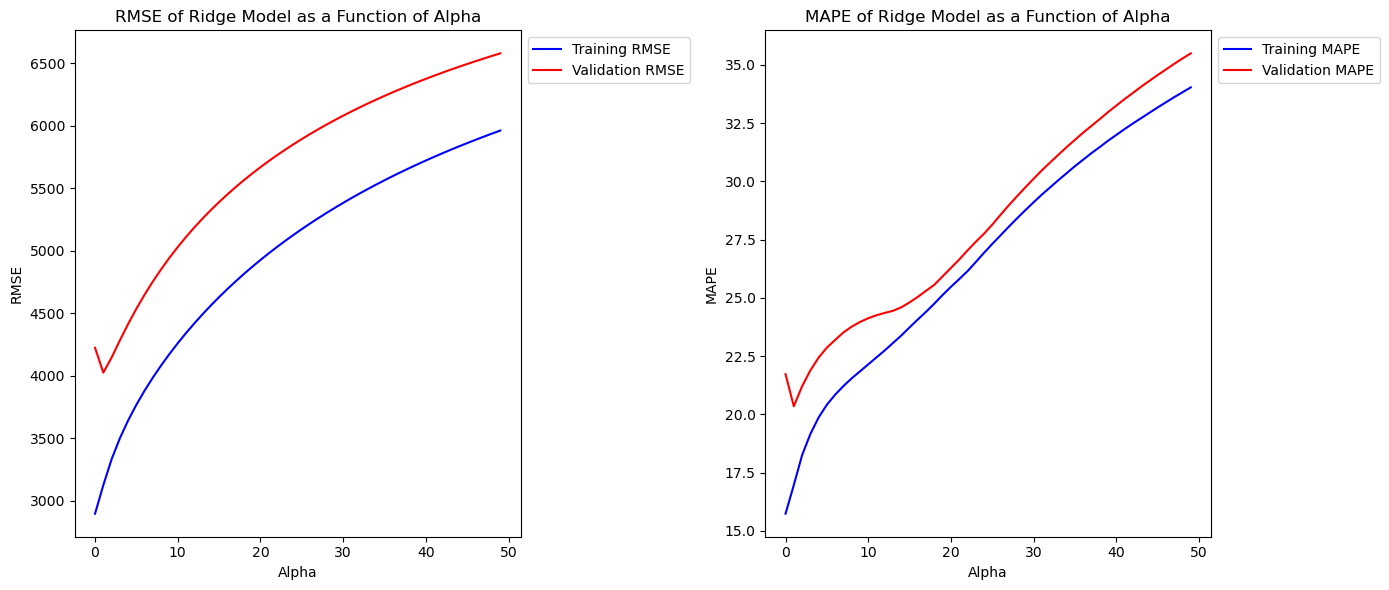

In [33]:
# Create a range of alpha values for tuning
alpha_vals = np.arange(0, 50, 1)

# Intialize lists to store training and validation performance metrics
train_rmse_list = []
train_mape_list = []
val_rmse_list = []
val_mape_list = []

for alpha_val in alpha_vals:
    temp_model = Ridge(alpha = alpha_val)
    temp_model = temp_model.fit(X_train_dummies[features_considered], y_train)
    
    train_preds = temp_model.predict(X_train_dummies[features_considered])
    
    train_rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_preds))
    train_mape = np.mean(np.abs(y_train - train_preds) / y_train) * 100
    
    val_preds = temp_model.predict(X_val_dummies[features_considered])
    
    val_rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = val_preds))
    val_mape = np.mean(np.abs(y_val - val_preds) / y_val) * 100
    
    train_rmse = np.round(train_rmse, 2)
    train_mape = np.round(train_mape, 2)
    
    val_rmse = np.round(val_rmse, 2)
    val_mape = np.round(val_mape, 2)
    
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
    
    train_mape_list.append(train_mape)
    val_mape_list.append(val_mape)

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x = alpha_vals, y = train_rmse_list, label = 'Training RMSE', color = 'blue')
sns.lineplot(x = alpha_vals, y = val_rmse_list, label = 'Validation RMSE', color = 'red')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE of Ridge Model as a Function of Alpha')
plt.legend(bbox_to_anchor = (1, 1))

plt.subplot(1, 2, 2)
sns.lineplot(x = alpha_vals, y = train_mape_list, label = 'Training MAPE', color = 'blue')
sns.lineplot(x = alpha_vals, y = val_mape_list, label = 'Validation MAPE', color = 'red')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('MAPE of Ridge Model as a Function of Alpha')
plt.legend(bbox_to_anchor = (1, 1))

plt.tight_layout();

In [34]:
# Obtain the value of ridge alpha for minimum validation MAPE
best_ridge_alpha = alpha_vals[val_mape_list.index(min(val_mape_list))]
best_ridge_alpha

1

## Hyperparameter Tuning: LASSO Model

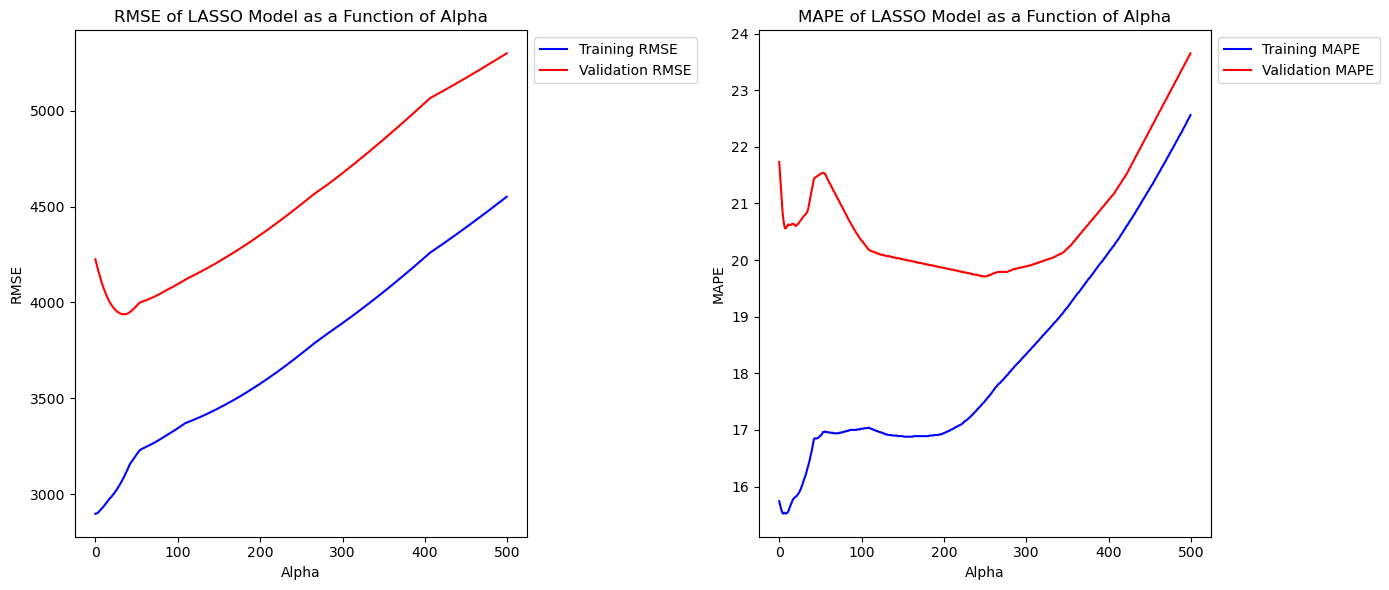

In [35]:
# Create a range of alpha values for tuning
alpha_vals = np.arange(0, 500, 1)

# Intialize lists to store training and validation performance metrics
train_rmse_list = []
train_mape_list = []
val_rmse_list = []
val_mape_list = []

for alpha_val in alpha_vals:
    temp_model = Lasso(alpha = alpha_val)
    temp_model = temp_model.fit(X_train_dummies[features_considered], y_train)
    
    train_preds = temp_model.predict(X_train_dummies[features_considered])
    
    train_rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = train_preds))
    train_mape = np.mean(np.abs(y_train - train_preds) / y_train) * 100
    
    val_preds = temp_model.predict(X_val_dummies[features_considered])
    
    val_rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = val_preds))
    val_mape = np.mean(np.abs(y_val - val_preds) / y_val) * 100
    
    train_rmse = np.round(train_rmse, 2)
    train_mape = np.round(train_mape, 2)
    
    val_rmse = np.round(val_rmse, 2)
    val_mape = np.round(val_mape, 2)
    
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
    
    train_mape_list.append(train_mape)
    val_mape_list.append(val_mape)

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x = alpha_vals, y = train_rmse_list, label = 'Training RMSE', color = 'blue')
sns.lineplot(x = alpha_vals, y = val_rmse_list, label = 'Validation RMSE', color = 'red')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE of LASSO Model as a Function of Alpha')
plt.legend(bbox_to_anchor = (1, 1))

plt.subplot(1, 2, 2)
sns.lineplot(x = alpha_vals, y = train_mape_list, label = 'Training MAPE', color = 'blue')
sns.lineplot(x = alpha_vals, y = val_mape_list, label = 'Validation MAPE', color = 'red')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('MAPE of LASSO Model as a Function of Alpha')
plt.legend(bbox_to_anchor = (1, 1))

plt.tight_layout();

In [36]:
# Obtain the value of LASSO alpha for minimum validation MAPE
best_lasso_alpha = alpha_vals[val_mape_list.index(min(val_mape_list))]
best_lasso_alpha

247

## Optimal Models

### Unregularized Model

In [37]:
# Look at the optimal unregularized model coefficients
lr_model_1.coef_

array([ 2036.45664199,  2416.81510542,  2495.53534628,  2039.31070779,
        5501.72045562, -1875.35789168, -6263.59324327, -5320.67230767,
       -7573.75502119, 15210.1175737 ,  7617.15070486, 13115.26881941,
       -4684.20926977, -5841.0604766 , 18257.81701758,  3465.62709909])

In [38]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_1.predict(X_train_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_train - y_pred_lr_list) / y_train) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Training RMSE = ', rmse)
print('Training MAPE = ', mape)

y_pred_lr_list = lr_model_1.predict(X_val_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_val - y_pred_lr_list) / y_val) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Validation RMSE = ', rmse)
print('Vaidation MAPE = ', mape)

y_pred_lr_list = lr_model_1.predict(X_test_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Testing RMSE = ', rmse)
print('Testing MAPE = ', mape)

Training RMSE =  2897.95
Training MAPE =  15.74
Validation RMSE =  4225.35
Vaidation MAPE =  21.73
Testing RMSE =  2851.99
Testing MAPE =  19.31


### Ridge Model

In [39]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using only the training data
lr_model_2 = Ridge(alpha = best_ridge_alpha)
lr_model_2 = lr_model_2.fit(X_train_dummies[features_considered], y_train)

In [40]:
# Look at the optimal ridge model coefficients
lr_model_2.coef_

array([  799.51729692,   656.42635177,   515.28742927,  -189.10522772,
        2597.61201283,   801.33933473, -3653.33343347, -2154.97143878,
       -4660.9032722 ,  5821.30705581, 10573.36546964, 11213.31242339,
       -1375.91786388, -3201.17045463,  9721.52931018, -1823.54628476])

In [41]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_2.predict(X_train_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_train - y_pred_lr_list) / y_train) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Training RMSE = ', rmse)
print('Training MAPE = ', mape)

y_pred_lr_list = lr_model_2.predict(X_val_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_val - y_pred_lr_list) / y_val) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Validation RMSE = ', rmse)
print('Vaidation MAPE = ', mape)

y_pred_lr_list = lr_model_2.predict(X_test_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Testing RMSE = ', rmse)
print('Testing MAPE = ', mape)

Training RMSE =  3126.23
Training MAPE =  16.97
Validation RMSE =  4026.5
Vaidation MAPE =  20.35
Testing RMSE =  2792.62
Testing MAPE =  21.06


### LASSO Model

In [42]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'price' using all the predictors
# Note: Using only the training data
lr_model_3 = Lasso(alpha = best_lasso_alpha)
lr_model_3 = lr_model_3.fit(X_train_dummies[features_considered], y_train)

In [43]:
# Look at the optimal LASSO model coefficients
lr_model_3.coef_

array([    0.        ,     0.        ,    -0.        ,    -0.        ,
         235.69613768,     0.        ,  -975.31924403,     0.        ,
        -165.17581952,     0.        , 14151.30031442,  6819.6910463 ,
           0.        ,    -0.        , 10188.87480414,    -0.        ])

In [44]:
# Look at the predictive performance of this model
y_pred_lr_list = lr_model_3.predict(X_train_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_train - y_pred_lr_list) / y_train) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Training RMSE = ', rmse)
print('Training MAPE = ', mape)

y_pred_lr_list = lr_model_3.predict(X_val_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_val, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_val - y_pred_lr_list) / y_val) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Validation RMSE = ', rmse)
print('Vaidation MAPE = ', mape)

y_pred_lr_list = lr_model_3.predict(X_test_dummies[features_considered])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list) / y_test) * 100

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

print('Testing RMSE = ', rmse)
print('Testing MAPE = ', mape)

Training RMSE =  3723.01
Training MAPE =  17.47
Validation RMSE =  4502.56
Vaidation MAPE =  19.71
Testing RMSE =  2652.97
Testing MAPE =  17.3
